# What is lexicon

In [1]:
# a list of positive words and negative words. Scan the text with these words, figure out the positive and negative reviews

# What lexicon I am using in this analysis

In [2]:
# I am using Bing Liu lexicon, pattern and python package

# Bing Liu Lexicon

In [18]:
import csv
import re
import pandas as pd

import nltk
from nltk.corpus import stopwords
import collections
from collections import Counter
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

In [19]:
openfile = open("data/hw_sentimentanalysis.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()
for i in reviews:
    print i


["I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."]
["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters

# 1.2 Count the total reviews

In [20]:
reviews = [x for y in reviews for x in y]
len(reviews)

106

In [21]:
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

# remove extra brackets)
positive_review_tokens = [x for y in positive_review for x in y]

# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['the', 'and', 'this', 'that','also', 'could','movie', 'moviews','film', 'films', 'see', 'look','like'])
stoplist = set(stoplist) | more 


for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

4 3 1 Positive
6 4 2 Positive
11 5 6 Positive
9 6 3 Positive
10 6 4 Positive
7 1 6 Positive
5 7 -2 Negative
7 7 0 Neutral
9 8 1 Positive
1 0 1 Positive
11 4 7 Positive
6 12 -6 Negative
10 2 8 Positive
7 4 3 Positive
8 9 -1 Negative
1 3 -2 Negative
7 11 -4 Negative
5 5 0 Neutral
6 7 -1 Negative
13 4 9 Positive
4 1 3 Positive
7 3 4 Positive
10 0 10 Positive
8 8 0 Neutral
9 3 6 Positive
9 8 1 Positive
1 6 -5 Negative
13 3 10 Positive
1 13 -12 Negative
11 3 8 Positive
6 1 5 Positive
10 2 8 Positive
6 4 2 Positive
5 0 5 Positive
17 3 14 Positive
9 0 9 Positive
3 12 -9 Negative
7 9 -2 Negative
4 1 3 Positive
6 13 -7 Negative
14 2 12 Positive
11 1 10 Positive
9 0 9 Positive
8 2 6 Positive
17 1 16 Positive
6 1 5 Positive
3 3 0 Neutral
13 1 12 Positive
10 9 1 Positive
9 2 7 Positive
6 3 3 Positive
8 1 7 Positive
10 2 8 Positive
10 5 5 Positive
10 2 8 Positive
8 0 8 Positive
5 6 -1 Negative
11 2 9 Positive
0 4 -4 Negative
3 7 -4 Negative
9 9 0 Neutral
0 13 -13 Negative
7 4 3 Positive
13 3 10 Pos

# 1.3 Print the negative, positive reviews

In [22]:
# Separate positive and negative reviews
positive_review = []
negative_review = []
neutral_review = []
for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

# 3.How many movie reviews are positive/negative/neural according to Bing Liu's method

In [37]:
print len(positive_review)
print len(negative_review)
print len(neutral_review)

69
28
9


In [39]:
# Word frequency on positive reviews and popular words
texts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]
texts
# remove extra brackets
positive_review_tokens = [x for y in texts for x in y]
positive_review_tokens
# word frequency on positive reviews
f_positive = nltk.FreqDist(positive_review_tokens)
f_positive





FreqDist({'represent': 1,
          'finney': 5,
          'consider': 1,
          'beware': 1,
          'dynamic': 1,
          'suspenseful': 1,
          'dynasty': 1,
          'four': 1,
          'classy': 1,
          'thoughtful': 1,
          'follow': 1,
          'disk': 1,
          'minuscule': 1,
          'children': 4,
          'reluctant': 1,
          'relationships': 1,
          'whose': 1,
          'thursday': 1,
          'endings': 1,
          'originality': 1,
          'program': 2,
          'fischer': 1,
          'lord': 1,
          'sorry': 1,
          'pride': 1,
          'worth': 3,
          'sound': 2,
          'woman': 7,
          'rescue': 1,
          'song': 4,
          'far': 7,
          'desirable': 1,
          'horror': 7,
          'ouch': 1,
          'smack': 1,
          'every': 6,
          'surprise': 2,
          'winning': 1,
          'month': 3,
          'bringing': 1,
          'special': 7,
          'fae': 1,
         

In [43]:
# prepare the results of word frequency on auto data as a list

freq_word = []

# two values or columns in f_positive
for k,v in f_positive.items():
    freq_word.append([k,v])

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word_pos', 1: 'freq_pos'})
# popular words
wp = wordlist.sort_values('freq_pos', ascending=False)
wp.to_csv("data/positive_reviews_freq.csv")
# count positive wordlist
print len(wp)
wp.head(10)


1914


,word_pos,freq_pos
1507,great,44
690,one,34
1173,story,30
351,characters,27
59,would,26
1779,well,26
1107,good,25
1133,really,24
483,time,20
52,julie,19


# 7.Word Cloud of positive words

In [44]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

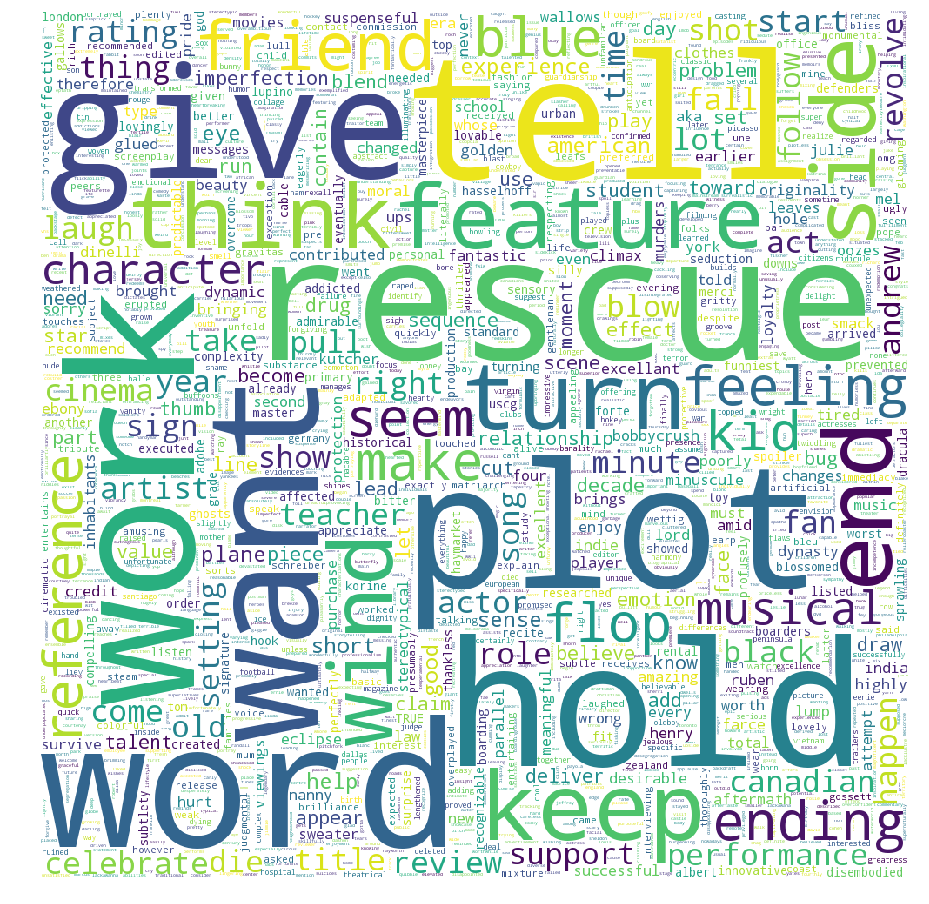

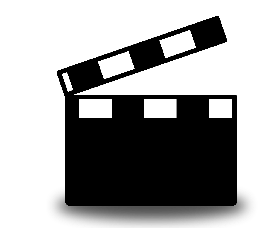

In [45]:

d = path.dirname("data/examples/")

# Read the whole text.
text = open(path.join(d, 'pos_reviews_freq.txt')).read()
#additional stopwrods
stopwords = set(STOPWORDS)
stopwords.add("movie")
stopwords.add("moviews")
stopwords.add("film")
stopwords.add("films")
stopwords.add("see")
stopwords.add("look")
# read the mask image

movie_mask = np.array(Image.open(path.join(d, "movie.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=movie_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(movie_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("movie_mask")
plt.savefig("data/movie.pdf")

In [46]:
# Word frequency on negative reviews and popular words on negative reviews
texts = [[word for word in text if word not in stoplist] for text in negative_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]
texts
# remove extra brackets
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens
# word frequency on negative reviews
negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(20)

[('one', 17),
 ('people', 13),
 ('even', 11),
 ('good', 9),
 ('really', 9),
 ('ever', 8),
 ('acting', 8),
 ('little', 8),
 ('make', 8),
 ('plot', 7),
 ('two', 7),
 ('killer', 7),
 ('scenes', 7),
 ('seen', 7),
 ('get', 7),
 ('bad', 7),
 ('much', 7),
 ('made', 7),
 ('time', 7),
 ('children', 6)]

# prepare the results of word frequency on auto data as a list

In [47]:


freq_word = []

# two values or columns in f_positive
for k,v in negative_review_wordcounts.items():
    freq_word.append([k,v])


#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word_neg', 1: 'freq_neg'})
# popular words
wn = wordlist.sort_values('freq_neg', ascending=False)
wn.to_csv('data/negative_reviews_freq.csv')
# Count negative wordlist
print len(wn)
wn.head(10)

1047


,word_neg,freq_neg
373,one,17
851,people,13
67,even,11
281,good,9
321,really,9
82,ever,8
329,acting,8
380,little,8
729,make,8
129,plot,7


# Word Cloud of negative reviews


(-0.5, 999.5, 999.5, -0.5)

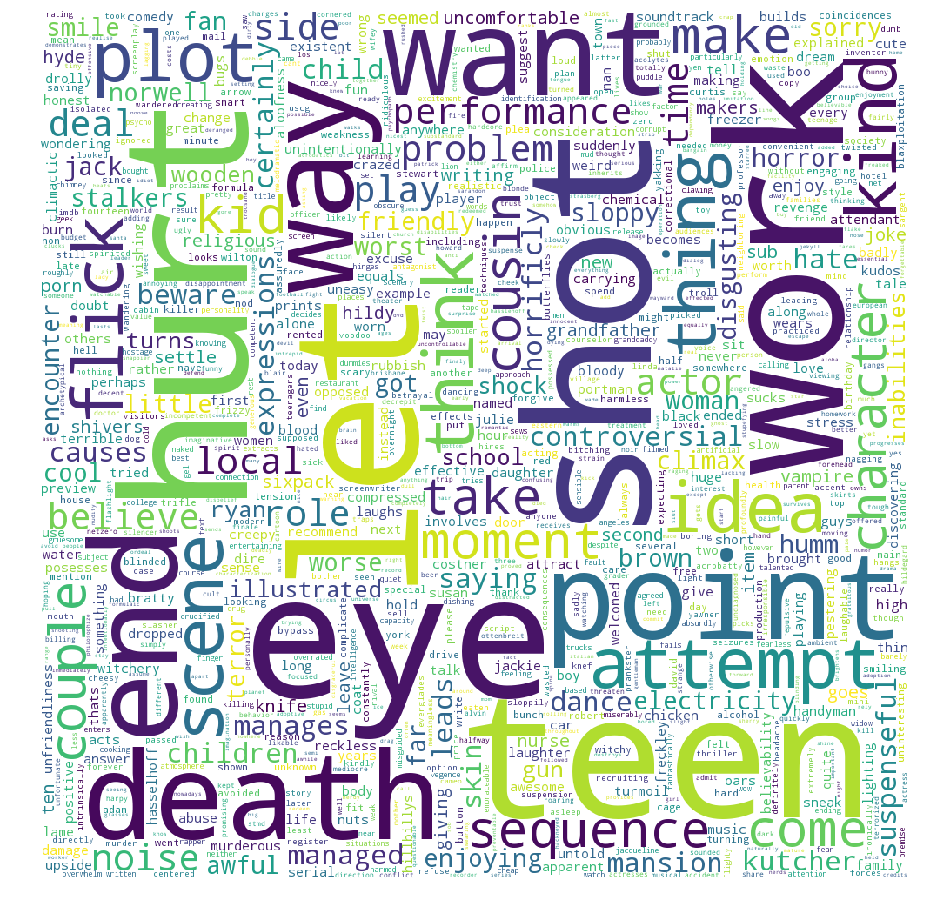

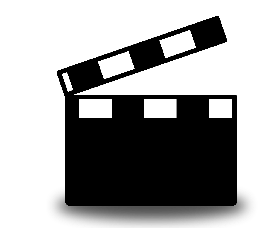

In [48]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

d = path.dirname("data/examples/")

# Read the whole text.
text = open(path.join(d, 'neg_reviews_freq.txt')).read()
#additional stopwrods
stopwords = set(STOPWORDS)
stopwords.add("movie")
stopwords.add("movies")
stopwords.add("film")
stopwords.add("films")
stopwords.add("see")
stopwords.add("look")
# read the mask image

movie_mask = np.array(Image.open(path.join(d, "movie.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=movie_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(movie_mask, cmap=plt.cm.gray)
plt.axis("off")


# Different numbers in positive and negative reviews

In [49]:

print len(wp)
print len(wn)

1914
1047


# Pattern

In [5]:
from pattern.en import sentiment
import csv
import pandas as pd

import re

import nltk
from nltk.corpus import stopwords

In [6]:
reviews = []
openfile = open('data/hw_sentimentanalysis.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    reviews.append(i)  
openfile.close()

score=[]
for row in reviews:
    score.append(sentiment(row[0]))

output=zip(score)
writer = csv.writer(open('data\\HW_output_sentiscore.csv', 'wb'))
writer.writerows(output)




# count sentiment scores for positive and negative words for each sentences

In [7]:
#remove extra brackets
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

for row in texts:
    data = row[0]
    score = sentiment(data)
    print score[0], score[1] 

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.5
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.9 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-0.21 0.18
-0.3125 0.6875
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-0.5 1.0
0.0 0.0
0.0 0.0
0.1 1.0
0.0 0.0
0.1 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.1 0.4
0.0 0.0
0.0 0.0
0.166666666667 0.666666666667
0.8 0.75
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-0.4 1.0
0.0 0.0
0.0 0.0
0.2 0.9
0.0 0.0
0.8 0.75
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.3 0.2
0.0 0.0
0.2 0.2
0.0 0.0
0.0 0.0
0.0 0.0
0.25 1.0
0.25 0.333333333333
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.4 0.7
0.0 0.0
0.0 0.0
0.7 0.9
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.7 0.6
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.1 1.0
-0.6 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.227272727273 0.545454545455
0.0 0.0
0.0 0.0
0.0 0.3
0.0 0.0
0.0 0.0


In [12]:
positive_review = []
negative_review = []
neutral_review = []

for row in texts:
    data = row[0]
    score = sentiment(data)
    if score[0] > 0:
        positive_review.append(data)
    elif score[0] == 0:
        neutral_review.append(data)
    else:
        negative_review.append(data)

# Count the number of the positive and negative reviews

In [13]:
print len(positive_review)
print len(negative_review)
print len(neutral_review)

21
5
80


In [15]:
positive_review

['brilliant',
 'far',
 'wow',
 'wonderful',
 'completely',
 'decent',
 'great',
 'absolutely',
 'great',
 'superb',
 'fun',
 'really',
 'avid',
 'first',
 'fortunate',
 'talented',
 'good',
 'excellent',
 'wow',
 'marvelous',
 'positive']

In [16]:
negative_review

['pale', 'mean', 'sorry', 'alas', 'artificial']

In [18]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in positive_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [20]:
# print the first 10 positive reviews
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens[:10]

['brilliant',
 'far',
 'wow',
 'wonderful',
 'completely',
 'decent',
 'great',
 'absolutely',
 'great',
 'superb']

# Another Python Package_textblob

In [4]:
!pip install textblob

In [51]:
from textblob import TextBlob
import csv

In [52]:
openfile = open("data/hw_sentimentanalysis.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()
for i in reviews:
    print i
# Seperate reviews as sentences, and string the sentences.
texts = [x for y in reviews for x in y]
texts = str(texts)

["I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."]
["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters

In [56]:
blob = TextBlob(texts)
blob.tags           # [('The', 'DT'), ('romantic', 'JJ'),
                    #  ('emotion', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['movie', 'blob',
                    #            'ultimate movie monster',
                    #            'blonde-Debbie', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
# 0.060 positive scores
# -0.341  negative scores

blob.translate(to="es")  

-0.1
0.25
-0.5
0.1
0.7
0.25
-0.0166666666667
0.241666666667
0.8
0.05
-0.13
0.2
-0.03
0.5
0.25
-0.229166666667
0.5
-0.25
0.0
-0.0125
-0.1875
0.5
0.361111111111
-0.135
0.425
0.270833333333
0.7
0.0
1.0
0.0
-0.1875
0.165
0.05
0.2
0.0
0.0
0.13
0.05
0.36
0.0
0.125
0.0
0.0
0.25
0.5
0.0
1.0
-0.0777777777778
0.0
0.0
0.15
0.5
0.525
0.3
0.184375
0.5
0.0
2.77555756156e-17
0.0
-0.05
-0.1
0.25625
0.0
0.0
-0.225
-0.0666666666667
0.09
-0.6
0.366666666667
0.106818181818
-0.0255681818182
0.311904761905
-0.45
0.9
0.5
0.5
0.282738095238
0.0444444444444
0.0333333333333
-0.00416666666667
-0.11
0.075
0.0
-0.833333333333
0.0
-0.275
0.0
0.5
0.533333333333
0.855
0.382291666667
0.0
0.361111111111
-0.0604166666667
0.8
0.0
0.8
0.0
-0.171666666667
0.2
0.0
-0.025
0.0555555555556
0.433333333333
-0.15
0.0
0.4
0.0
0.304761904762
0.09375
-0.2
0.0
0.0
0.175
-0.4
-0.8
-0.166666666667
0.0527777777778
0.208333333333
0.0
0.14
-0.49375
-0.15
-0.2225
0.5
0.0142857142857
0.0
-0.375
0.4
0.0
0.9
0.141666666667
0.25
0.416666666667

TextBlob("["Fui y vi esta película la noche anterior después de ser persuadida por unos cuantos amigos míos.Admito que era reacio a ver porque de lo que sabía de Ashton Kutcher sólo podía hacer la comedia. Kutcher jugó muy bien el personaje de Jake Fischer, y Kevin Costner interpretó a Ben Randall con tanta profesionalidad.El signo de una buena película es que puede jugar con nuestras emociones.Éste hizo exactamente eso.El teatro entero (que se vendió out) fue superado por la risa durante la primera mitad de la película, y se conmovió hasta las lágrimas durante la segunda mitad.Al salir del teatro no sólo vi a muchas mujeres en lágrimas, sino también muchos hombres adultos, tratando desesperadamente de no dejar nadie lo vea llorar Esta película fue genial y le sugiero que vaya a verla antes de juzgar "," Una vez más, el Sr. Costner ha arrastrado una película por mucho más tiempo de lo necesario. que hay muy pocos que simplemente no se preocupan por ninguno de los personajes. La mayoría

# What is the unique about this package

In [ ]:
# Can collect the NN,IN, JJ,DT with tag, and analyze the positive-negative, and translate the text

# which method is better


In [57]:
# All total reiews is 106, but for Bing Liu lexcion the positive review is 69,negative review are 28, and neutral reviews are 9.
# paterns the positive reviews are 21, negative reviews are 5 and most of the reviews are neutral.
# textblob the polarity for first review is -o.1, it is treated as neutral reviews.
#bing liu method is better for sentiment. Take the first review for example, It talk more about the bad about the reviewer thought it should be , but the result if positive. 
# For patterns the first review is 0.0:0.0, it is neutral .
  

# Overall reviews

In [ ]:
# This movie is kind of terrified
# The music, story is good, but too much music, make it is more like musical, not a movie
# The light is not comfortable
# Good characters
# Actors and Actresses are good
# Good editors

# Potential ares

In [1]:
# When industry has a new product line, they can analyze the customers' review for these products, then develope this line 
# to satisfiy the customers

# References
https://pypi.python.org/pypi/textblob